In [1]:
from google.colab import drive
dataset_file = '/content/drive/MyDrive/Colab Notebooks/Cellula-ML-Projects/Datasets/Hotels-Booking.csv'
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from flask import Flask, request, render_template

### read dataset and remove any whitespaces from columns name

In [5]:
data = pd.read_csv(dataset_file)
data.columns = data.columns.str.strip()

In [6]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [ ]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### drop unnecessary feature

In [ ]:
data = data.drop('Booking_ID', axis=1)

### convert 'date of reservation' to datetime values

In [ ]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
# remove invalid dates
data.dropna(subset=['date of reservation'], inplace=True)

### split 'date of reservation' to year, month & day features

In [ ]:
data['year'] = data['date of reservation'].dt.year
data['month'] = data['date of reservation'].dt.month
data['day'] = data['date of reservation'].dt.day
data = data.drop('date of reservation', axis=1)

### convert object values to numeric values

In [ ]:
label_encoder = LabelEncoder()
data['type of meal'] = label_encoder.fit_transform(data['type of meal'])
data['room type'] = label_encoder.fit_transform(data['room type'])
data['market segment type'] = label_encoder.fit_transform(data['market segment type'])
data['booking status'] = label_encoder.fit_transform(data['booking status'])

### remove adults that equal zero and have children

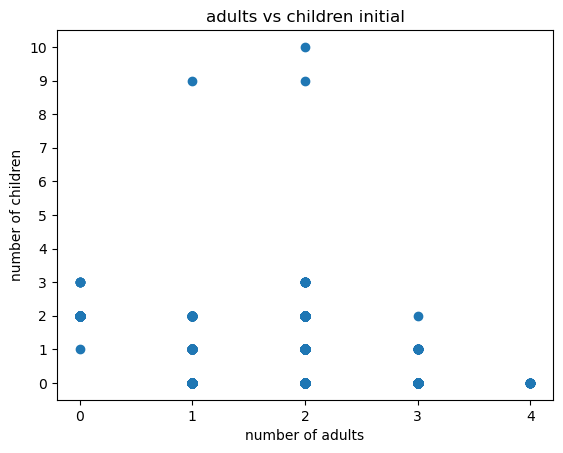

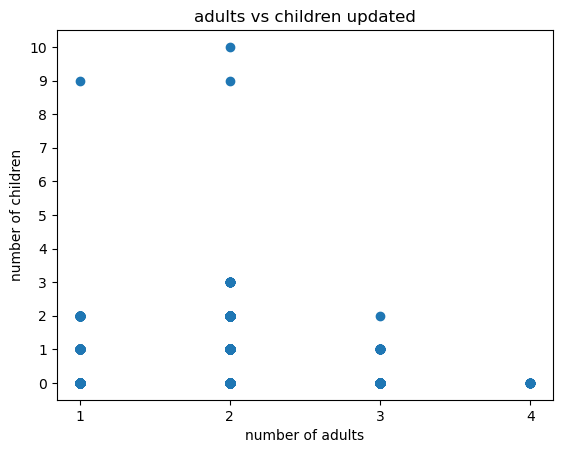

In [ ]:
def adults_vs_children(scatter_title):
    x = data['number of adults']
    y = data['number of children']
    plt.scatter(x, y)
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    plt.yticks(np.arange(min(y), max(y)+1, 1))
    plt.xlabel('number of adults')
    plt.ylabel('number of children')
    plt.title(scatter_title)
    plt.show()

adults_vs_children('adults vs children initial')
data.drop(data[(data['number of adults'] == 0) & (data['number of children'] > 0)].index, inplace=True)
adults_vs_children('adults vs children updated')

### detect Outliers with visual tool

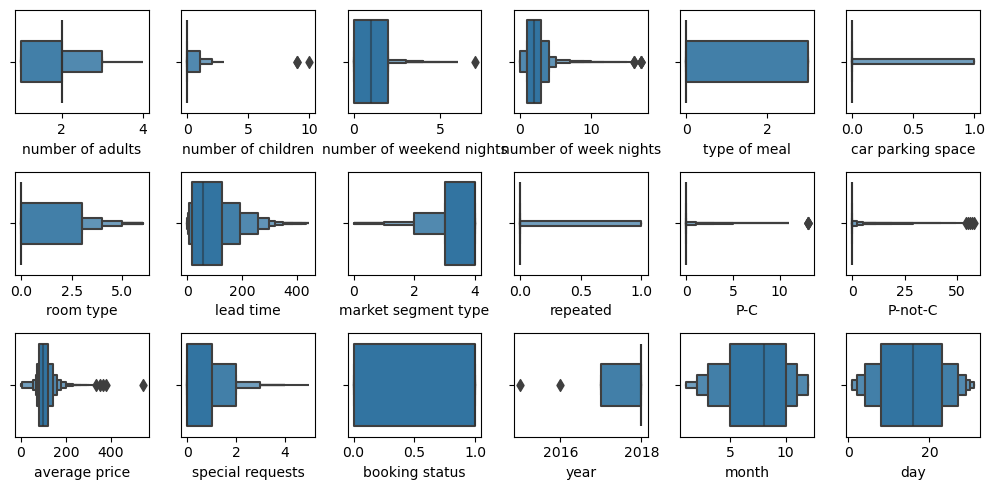

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(10, 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.boxenplot(x=data[col], ax=axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

### detect Outliers with Mathematical tool

In [ ]:
print("Old shape of data: ", data.shape)

# using IQR to detect outliers
for col in ['average price']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Calculate IQR, upper, and lower bounds
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a mask for outliers
    outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)

    # Remove outliers
    data = data[~outlier_mask]

print("New shape of data: ", data.shape)

Old shape of data:  (36109, 18)
New shape of data:  (34436, 18)


### split the data to training, validation and testing

In [ ]:
data_input = data.drop('booking status', axis=True)
data_output = data['booking status']

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=2)
X_train,X_val, y_train, y_val = train_test_split(data_input, data_output, test_size=0.33, random_state=2)

print('X_train = ', X_train.shape)
print('X_val = ', X_val.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_val = ', y_val.shape)
print('y_test = ', y_test.shape)

X_train =  (23072, 17)
X_val =  (11364, 17)
X_test =  (11364, 17)
y_train =  (23072,)
y_val =  (11364,)
y_test =  (11364,)


### features normalization

In [ ]:
scaler = MinMaxScaler()
# detect mean & standard deviation
scaler.fit_transform(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test= scaler.transform(X_test)

### evaluate_model method that use frequently to measure accuracy of each model used

In [ ]:
accuracy_score_train = {
    'Model': [],
    'Accuracy': []
}
accuracy_score_val = {
    'Model': [],
    'Accuracy': []
}

def evaluate_model(model, X_train, y_train, X_val, y_val):
    if model.__class__.__name__ == 'KNeighborsClassifier':
        model.fit(np.ascontiguousarray(X_train), np.ascontiguousarray(y_train))
        y_predict_train = model.predict(np.ascontiguousarray(X_train))
        y_predict_val = model.predict(np.ascontiguousarray(X_val))
    else:
        model.fit(X_train, y_train)
        y_predict_train = model.predict(X_train)
        y_predict_val = model.predict(X_val)

    accuracy_score_train['Model'].append(model.__class__.__name__)
    accuracy_score_train['Accuracy'].append(accuracy_score(y_train, y_predict_train))
    accuracy_score_val['Model'].append(model.__class__.__name__)
    accuracy_score_val['Accuracy'].append(accuracy_score(y_val, y_predict_val))

### try the following algo & find the best accuracy:
* Logistics Regression
* KNN
* SVM
* Decision Trees
* Random Forest

In [ ]:
Logistic_reg = LogisticRegression(random_state=1)
k_neighbors = KNeighborsClassifier()
support_vector = SVC(random_state=1)
decision_tree = DecisionTreeClassifier(random_state=1)
random_forest = RandomForestClassifier(random_state=1)

evaluate_model(Logistic_reg, X_train, y_train, X_val, y_val)
evaluate_model(k_neighbors, X_train, y_train, X_val, y_val)
evaluate_model(support_vector, X_train, y_train, X_val, y_val)
evaluate_model(decision_tree, X_train, y_train, X_val, y_val)
evaluate_model(random_forest, X_train, y_train, X_val, y_val)

In [ ]:
accuracy_train_tbl = pd.DataFrame(accuracy_score_train)
accuracy_val_tbl = pd.DataFrame(accuracy_score_val)
accuracy_tbl = pd.merge(accuracy_train_tbl, accuracy_val_tbl, on='Model')
accuracy_tbl = accuracy_tbl.rename(columns={'Accuracy_x': 'accuracy_score_train', 'Accuracy_y': 'accuracy_score_val'})
accuracy_tbl

,Model,accuracy_score_train,accuracy_score_val
0,LogisticRegression,0.802748,0.800158
1,KNeighborsClassifier,0.892467,0.850405
2,SVC,0.826976,0.824006
3,DecisionTreeClassifier,0.994105,0.863252
4,RandomForestClassifier,0.994062,0.900651


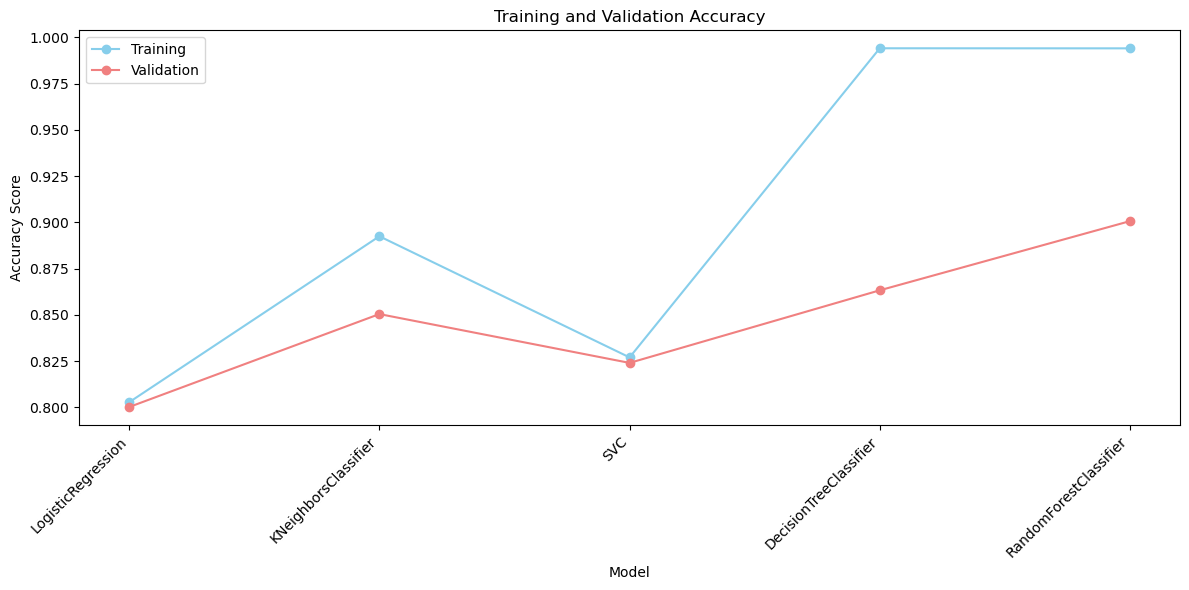

In [ ]:
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy lines
plt.plot(accuracy_tbl['Model'], accuracy_tbl['accuracy_score_train'], marker='o', label='Training', color='skyblue')
plt.plot(accuracy_tbl['Model'], accuracy_tbl['accuracy_score_val'], marker='o', label='Validation', color='lightcoral')

plt.xticks(rotation=45, ha='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.legend()
plt.tight_layout()

plt.show()

### use the best model

In [ ]:
model_best_acc = SVC(random_state=1)
model_best_acc.fit(X_train, y_train)
y_predict_test = model_best_acc.predict(X_test)
print('accuracy_score for SVC: ', accuracy_score(y_test, y_predict_test))

accuracy_score for SVC:  0.8240056318197818


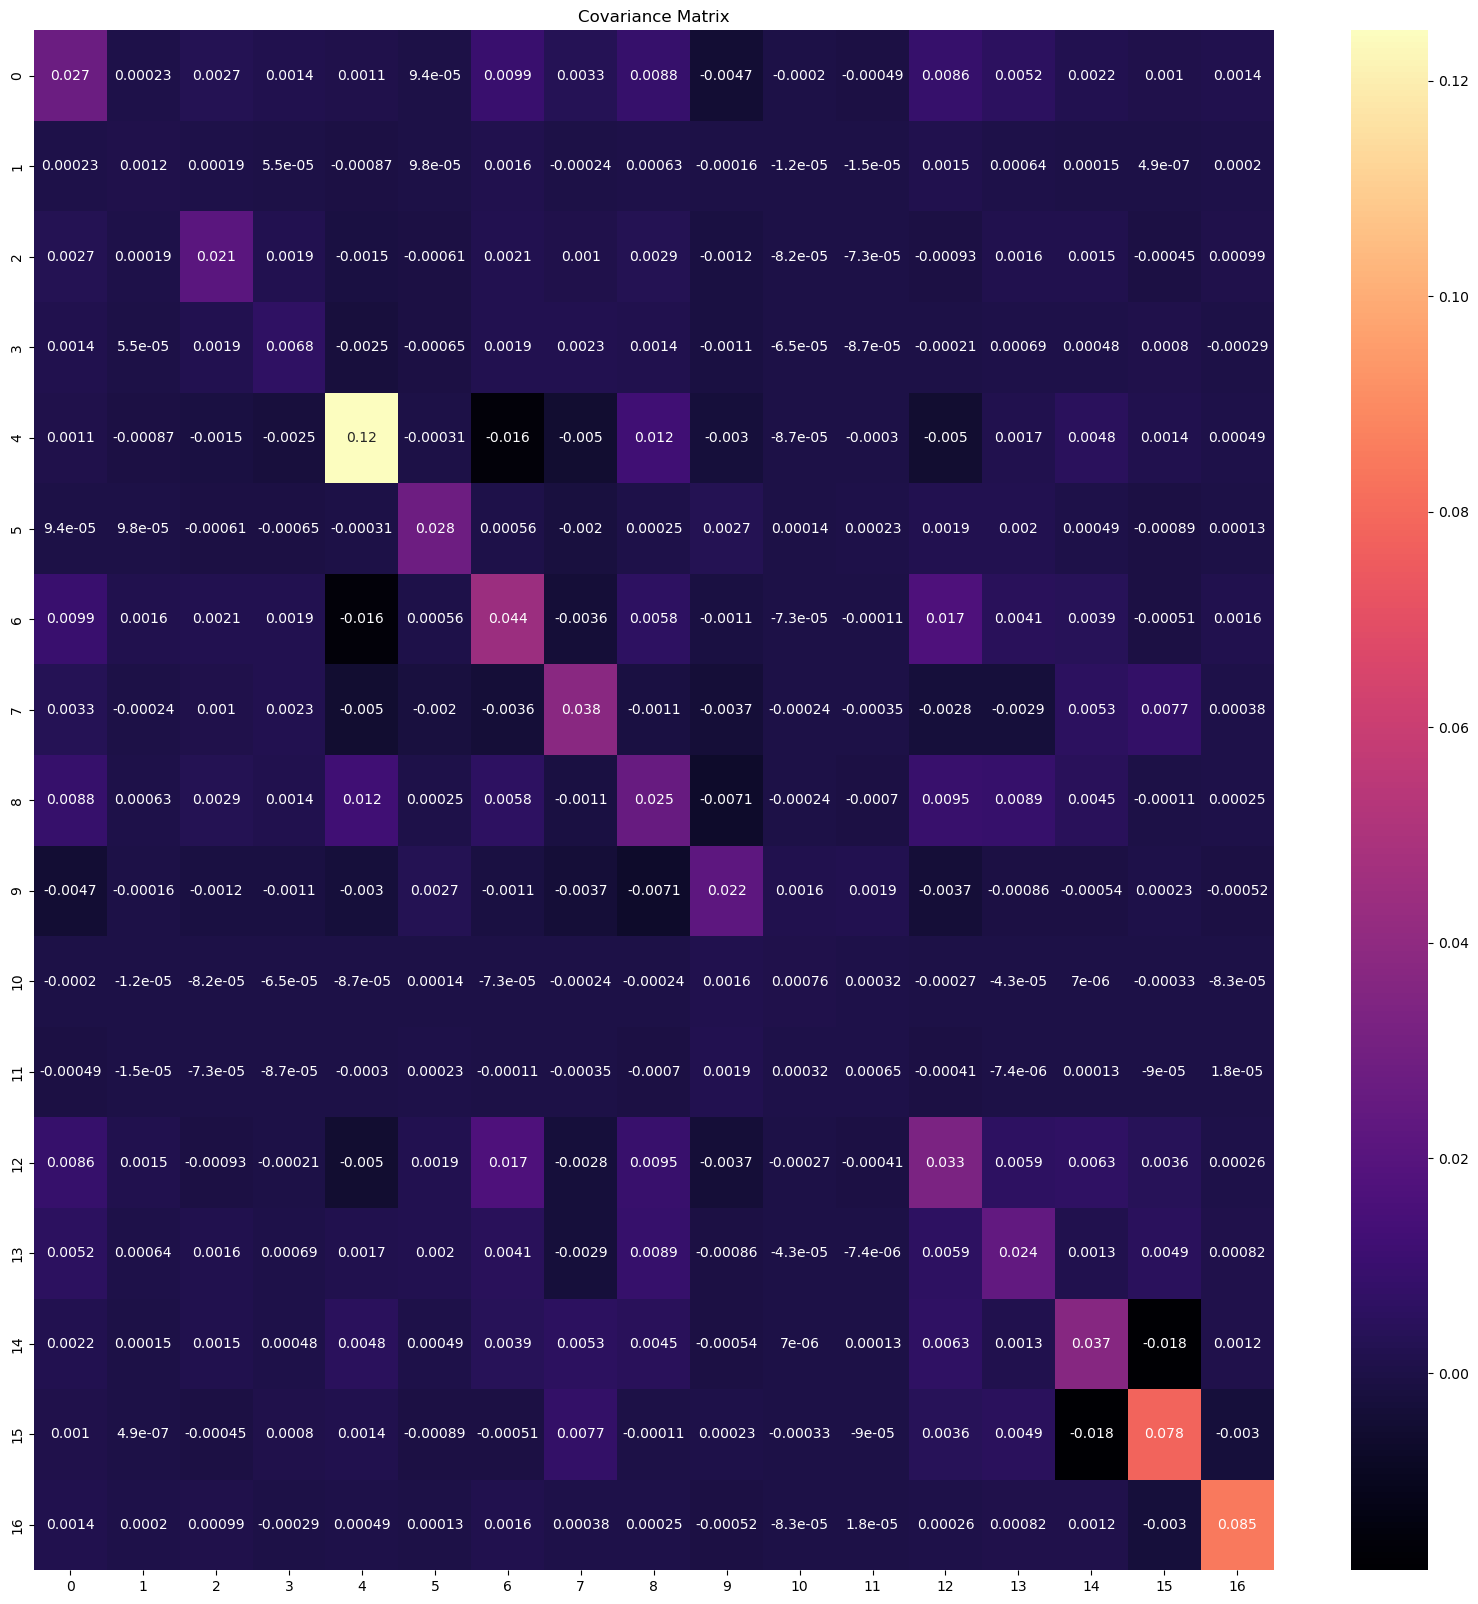

In [ ]:
# Calculate covariance matrix
covariance_matrix = np.cov(X_train, rowvar=False)

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(covariance_matrix, annot=True, cmap='magma')
plt.title('Covariance Matrix')
plt.show()

### save model in file

In [ ]:
pickle.dump(model_best_acc, open("Model.pkl", "wb"))